## ResNet50 1.0 with augmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", path)

100%|██████████| 325M/325M [00:03<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4


In [ ]:
import os
# List all image files recursively
Skin_img = glob.glob(os.path.join(path, '**', '*.jpg'), recursive=True)

# Print the paths of the first few images
# print(Skin_img)
for imgname in Skin_img[:3]:
    print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1187.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1380.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/866.jpg


In [ ]:
train_data = []
test_data = []

for img_path in Skin_img:
    if 'train' in img_path:
        train_data.append(img_path)
    elif 'test' in img_path:
        test_data.append(img_path)

print(f"Total Training Data Images: {len(train_data)}")
print(f"Total Testing Data Images: {len(test_data)}")
print(f"Sum of Training and Testing Images: {len(train_data)+len(test_data)}")

Total Training Data Images: 5274
Total Testing Data Images: 1320
Sum of Training and Testing Images: 6594


In [ ]:
total_images = len(train_data) + len(test_data)
train_percent = (len(train_data) / total_images) * 100
test_percent = (len(test_data) / total_images) * 100

print(f"Train data: {train_percent:.2f}%")
print(f"Test data: {test_percent:.2f}%")

Train data: 79.98%
Test data: 20.02%


In [ ]:
import os

train_benign = []
train_malignant = []
test_benign = []
test_malignant = []

for img in train_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        train_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        train_malignant.append(img)

for img in test_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        test_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        test_malignant.append(img)

print(f"Number of Images of Benign Class in Training Data: {len(train_benign)}")
print(f"Number of Images of Malignant Class in Training Data: {len(train_malignant)}")
print(f"Number of Images of Benign Class in Testing Data: {len(test_benign)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant)}")

Number of Images of Benign Class in Training Data: 2880
Number of Images of Malignant Class in Training Data: 2394
Number of Images of Benign Class in Testing Data: 720
Number of Images of Maligant Class in Testing Data: 600


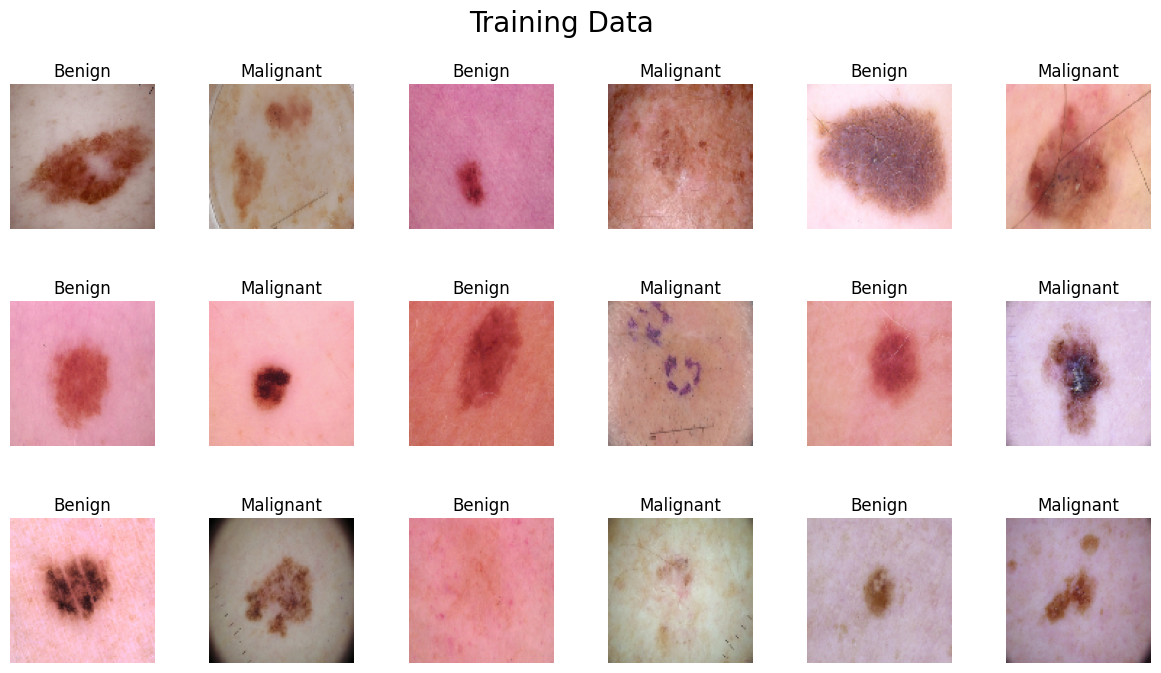

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming train_benign and train_malignant are lists of image paths
some_train_benign = np.random.randint(0, len(train_benign), 9)
some_train_malignant = np.random.randint(0, len(train_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Training Data', fontsize=20)

s = 0
for num in some_train_benign:
    img = image.load_img(train_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_train_malignant:
    img = image.load_img(train_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


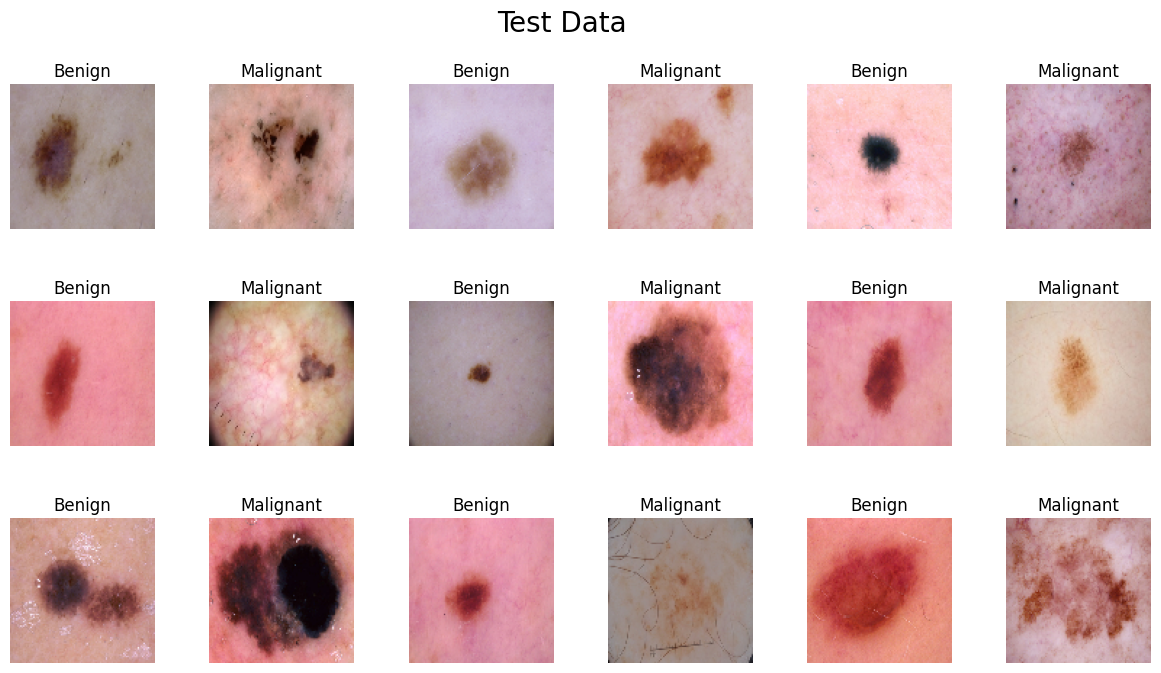

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming test_benign and test_malignant are lists of image paths
some_test_benign = np.random.randint(0, len(test_benign), 9)
some_test_malignant = np.random.randint(0, len(test_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Test Data', fontsize=20)

s = 0
for num in some_test_benign:
    img = image.load_img(test_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_test_malignant:
    img = image.load_img(test_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


In [ ]:

import cv2
import numpy as np
import random
import tensorflow as tf

# Function to preprocess images
def preprocess_image(img_path):
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Resize the image
    img_size = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_gray, dtype=tf.float32)
    # Normalize the image
    # img_tensor = tf.image.per_image_standardization(img_tensor)
    return img_tensor

In [ ]:
# Preprocess train images
train_benign_img_arr = []
train_malignant_img_arr = []

for img in train_benign:
    img_tensor = preprocess_image(img)
    train_benign_img_arr.append([img_tensor, 0])

for img in train_malignant:
    img_tensor = preprocess_image(img)
    train_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Training Data: {len(train_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Training Data: {len(train_malignant_img_arr)}")
print(f"Total Number Training Class Images: {len(train_benign_img_arr) + len(train_malignant_img_arr)}")

Number of Images of Benign Class in Training Data: 2880
Number of Images of Maligant Class in Training Data: 2394
Total Number Training Class Images: 5274


In [ ]:
# Combine and shuffle train data
train_img_arr = train_benign_img_arr + train_malignant_img_arr
random.shuffle(train_img_arr)

X_train = []
y_train = []

for feature, label in train_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_train.append(feature)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5274, 224, 224)
y_train shape: (5274,)


In [ ]:
# Preprocess test images
test_benign_img_arr = []
test_malignant_img_arr = []

for img in test_benign:
    img_tensor = preprocess_image(img)
    test_benign_img_arr.append([img_tensor, 0])

for img in test_malignant:
    img_tensor = preprocess_image(img)
    test_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Testing Data: {len(test_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant_img_arr)}")
print(f"Total Number Testing Class Images: {len(test_benign_img_arr) + len(test_malignant_img_arr)}")


Number of Images of Benign Class in Testing Data: 720
Number of Images of Maligant Class in Testing Data: 600
Total Number Testing Class Images: 1320


In [ ]:
# Combine and shuffle test data
test_img_arr = test_benign_img_arr + test_malignant_img_arr
random.shuffle(test_img_arr)

X_test = []
y_test = []

for feature, label in test_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_test.append(feature)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1320, 224, 224)
y_test shape: (1320,)


In [ ]:
# Split train data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=7)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (3955, 224, 224)
X_val shape: (1319, 224, 224)
y_train shape: (3955,)
y_val shape: (1319,)


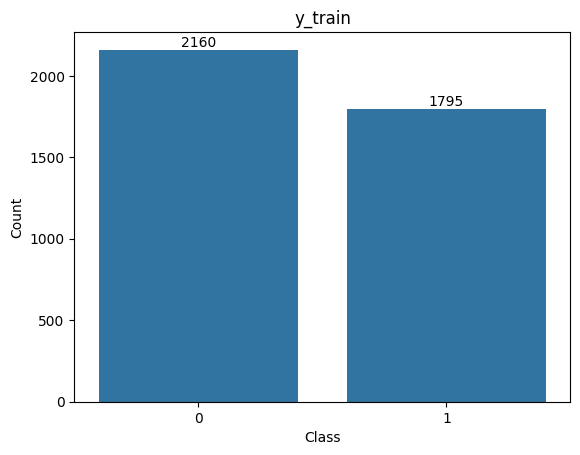

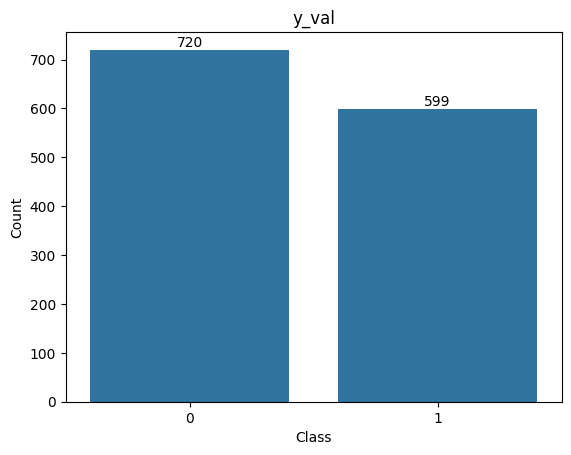

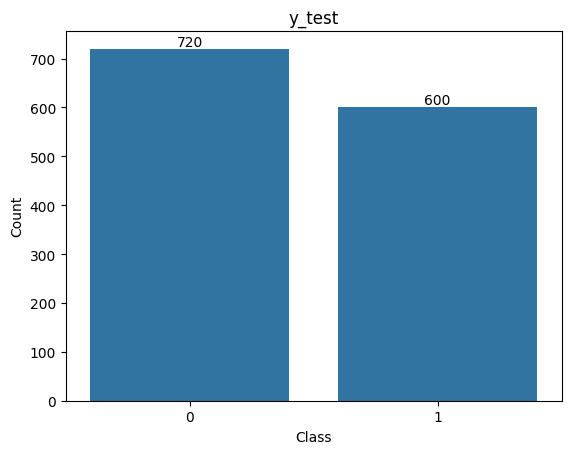

In [ ]:
# Plot class distribution
def plot_class_distribution(y, title):
    unique_values, value_counts = np.unique(y, return_counts=True)
    ax = sns.countplot(x=y)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(unique_values)
    plt.show()
    print()


plot_class_distribution(y_train, 'y_train')

# Add space after the first plot
plt.subplots_adjust(hspace=0.5)  # Adjust hspace for vertical space

plot_class_distribution(y_val, 'y_val')
plot_class_distribution(y_test, 'y_test')

In [ ]:
# Preprocess images for ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label


X_train, y_train = preprocess(X_train, y_train)
X_val, y_val = preprocess(X_val, y_val)
X_test, y_test = preprocess(X_test, y_test)

In [ ]:
# Build and compile the model
pretrained_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 1)) # Input is 1 channel
# Duplicate the grayscale channel to create a 3 channel input for ResNet50
x = tf.keras.layers.Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_layer)


data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2)
], name='data_augmentation')

da = data_augmentation_layer(x)
x = pretrained_model(da, training=False)
# x = pretrained_model(x, training=False)
bl = tf.keras.layers.BatchNormalization()(x)
flat = tf.keras.layers.Flatten()(bl)
drop = tf.keras.layers.Dropout(0.5)(flat)
dense = tf.keras.layers.Dense(512, activation='relu')(drop)
drop = tf.keras.layers.Dropout(0.5)(dense)
batch = tf.keras.layers.BatchNormalization()(drop)
dense = tf.keras.layers.Dense(32, activation='relu')(batch)
batch = tf.keras.layers.BatchNormalization()(dense)
# batch = tf.keras.layers.BatchNormalization()(flat)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(batch)

model_resnet50 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model_resnet50.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,663,617 (94.08 MB)

 Trainable params: 1,070,721 (4.08 MB)

 Non-trainable params: 23,592,896 (90.00 MB)

In [ ]:
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [ ]:

# Train the model
history = model_resnet50.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 47s 241ms/step - accuracy: 0.5328 - loss: 0.7746 - val_accuracy: 0.5459 - val_loss: 0.6894
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.5073 - loss: 0.7210 - val_accuracy: 0.5459 - val_loss: 0.6885
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.4998 - loss: 0.7076 - val_accuracy: 0.5459 - val_loss: 0.6920
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.5085 - loss: 0.7027 - val_accuracy: 0.4564 - val_loss: 0.6932
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.4890 - loss: 0.7057 - val_accuracy: 0.4541 - val_loss: 0.6953
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - accuracy: 0.4973 - loss: 0.7044 - val_accuracy: 0.5459 - val_loss: 0.6894
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.5072 - loss: 0.6979 - val_accuracy: 0.5459 - val_loss: 0.6889
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 46s 216ms/step - accuracy: 0.4913 - loss: 0

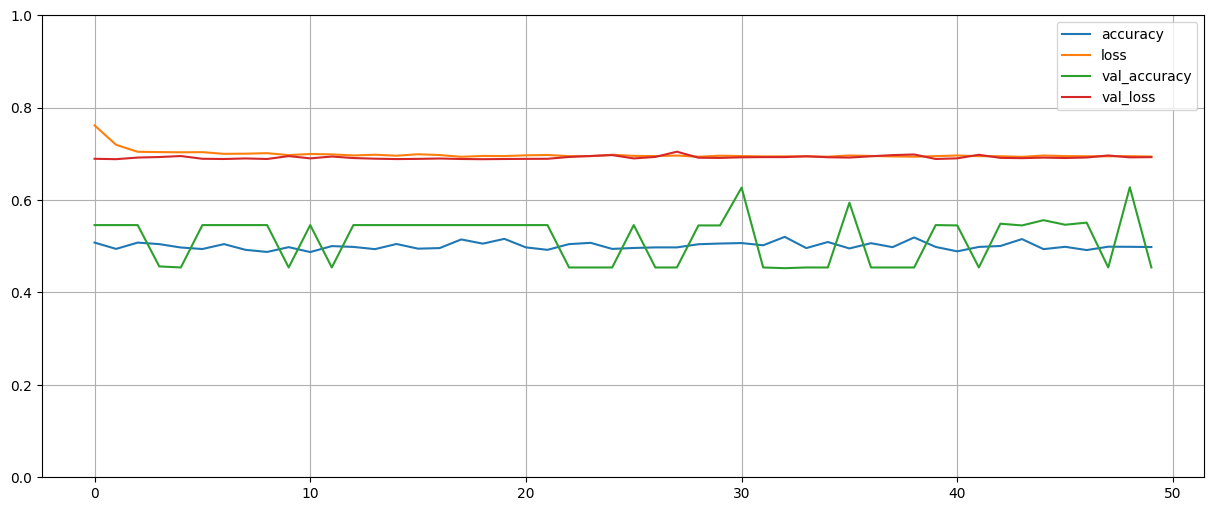

In [ ]:
# Plot training history
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [ ]:
# Evaluate the model
model_resnet50.evaluate(X_test, y_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.4575 - loss: 0.6928


[0.692876935005188, 0.4545454680919647]

In [ ]:

# Predict and evaluate
y_pred = model_resnet50.predict(X_test, verbose=1)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

class_labels = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=class_labels))


42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       720
   Malignant       0.45      1.00      0.62       600

    accuracy                           0.45      1320
   macro avg       0.23      0.50      0.31      1320
weighted avg       0.21      0.45      0.28      1320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


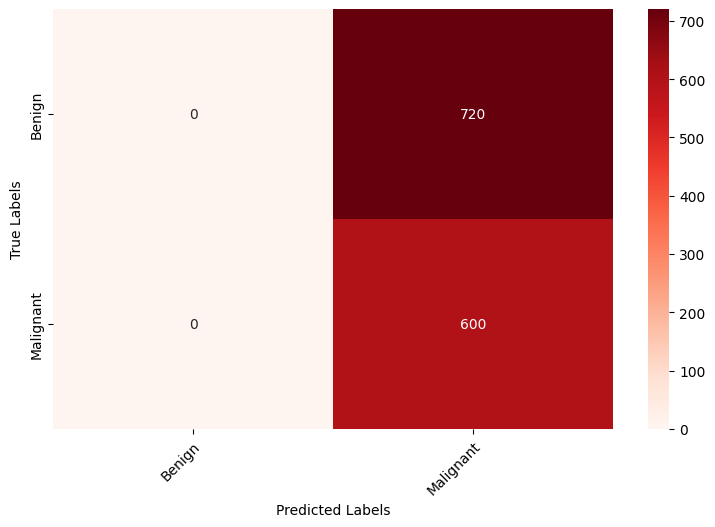

In [ ]:

# Plot confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
labels = list(class_labels)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## ResNet50 1.01 with augmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", path)

100%|██████████| 325M/325M [00:02<00:00, 123MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4


In [ ]:
# import os
# # List all image files recursively
# Skin_img = glob.glob(os.path.join(path, '**', '*.jpg'), recursive=True)

# # Print the paths of the first few images
# # print(Skin_img)
# for imgname in Skin_img[:3]:
#     print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1187.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1380.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/866.jpg


In [ ]:
import os
# List all image files recursively
# Skin_img = glob.glob(os.path.join(path, '**', '*.jpg'), recursive=True)

Skin_img = tf.io.gfile.glob(str(path + '/data/train/*/*'))
# Skin_img.extend(tf.io.gfile.glob(str(path + '/chest_xray/val/*/*')))
Skin_img.extend(tf.io.gfile.glob(str(path + '/data/test/*/*')))
# Print the paths of the first few images
# print(Skin_img)
for imgname in Skin_img[:3]:
    print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/malignant/143.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/malignant/456.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/malignant/252.jpg


In [ ]:
train_data = []
test_data = []

for img_path in Skin_img:
    if 'train' in img_path:
        train_data.append(img_path)
    elif 'test' in img_path:
        test_data.append(img_path)

print(f"Total Training Data Images: {len(train_data)}")
print(f"Total Testing Data Images: {len(test_data)}")
print(f"Sum of Training and Testing Images: {len(train_data)+len(test_data)}")

Total Training Data Images: 2637
Total Testing Data Images: 660
Sum of Training and Testing Images: 3297


In [ ]:
total_images = len(train_data) + len(test_data)
train_percent = (len(train_data) / total_images) * 100
test_percent = (len(test_data) / total_images) * 100

print(f"Train data: {train_percent:.2f}%")
print(f"Test data: {test_percent:.2f}%")

Train data: 79.98%
Test data: 20.02%


In [ ]:
import os

train_benign = []
train_malignant = []
test_benign = []
test_malignant = []

for img in train_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        train_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        train_malignant.append(img)

for img in test_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        test_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        test_malignant.append(img)

print(f"Number of Images of Benign Class in Training Data: {len(train_benign)}")
print(f"Number of Images of Malignant Class in Training Data: {len(train_malignant)}")
print(f"Number of Images of Benign Class in Testing Data: {len(test_benign)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant)}")

Number of Images of Benign Class in Training Data: 1440
Number of Images of Malignant Class in Training Data: 1197
Number of Images of Benign Class in Testing Data: 360
Number of Images of Maligant Class in Testing Data: 300


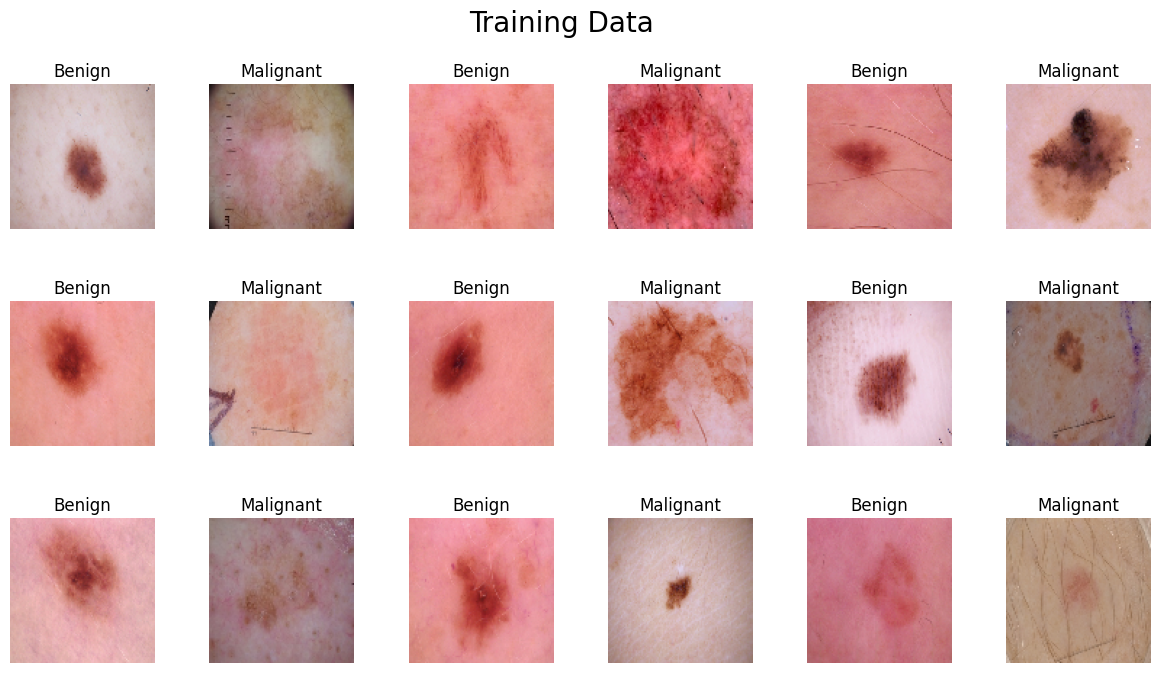

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming train_benign and train_malignant are lists of image paths
some_train_benign = np.random.randint(0, len(train_benign), 9)
some_train_malignant = np.random.randint(0, len(train_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Training Data', fontsize=20)

s = 0
for num in some_train_benign:
    img = image.load_img(train_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_train_malignant:
    img = image.load_img(train_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


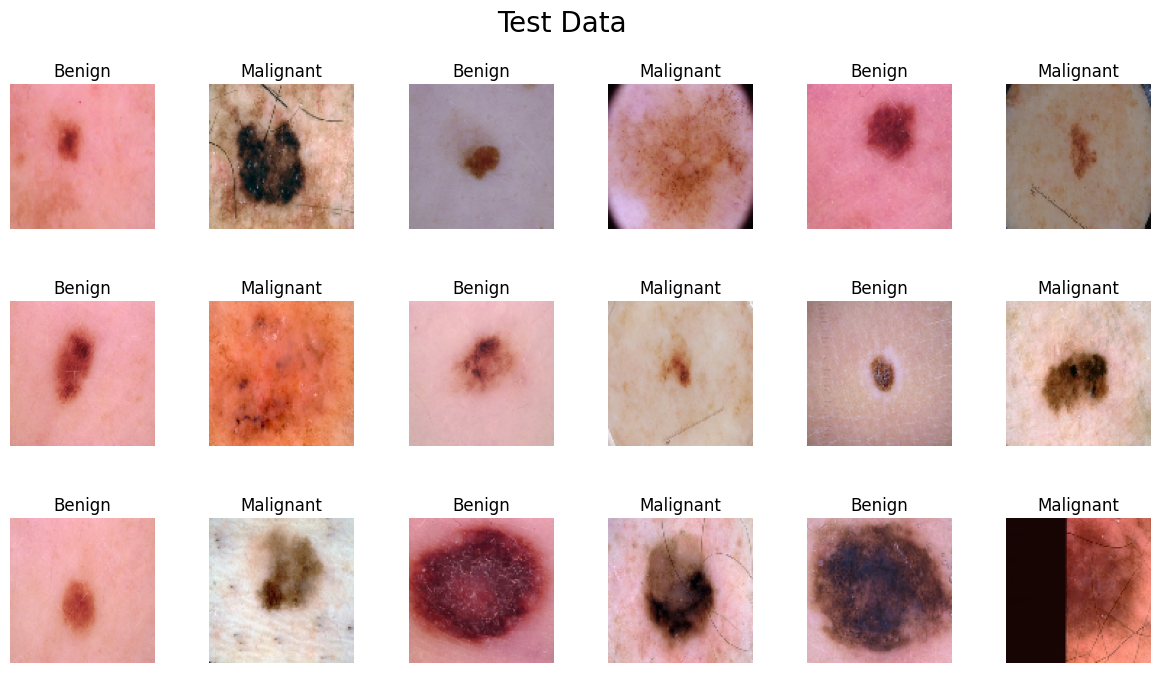

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming test_benign and test_malignant are lists of image paths
some_test_benign = np.random.randint(0, len(test_benign), 9)
some_test_malignant = np.random.randint(0, len(test_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Test Data', fontsize=20)

s = 0
for num in some_test_benign:
    img = image.load_img(test_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_test_malignant:
    img = image.load_img(test_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


In [ ]:

import cv2
import numpy as np
import random
import tensorflow as tf

# Function to preprocess images
def preprocess_image(img_path):
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Resize the image
    img_size = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_gray, dtype=tf.float32)
    # Normalize the image
    # img_tensor = tf.image.per_image_standardization(img_tensor)
    return img_tensor

In [ ]:
# Preprocess train images
train_benign_img_arr = []
train_malignant_img_arr = []

for img in train_benign:
    img_tensor = preprocess_image(img)
    train_benign_img_arr.append([img_tensor, 0])

for img in train_malignant:
    img_tensor = preprocess_image(img)
    train_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Training Data: {len(train_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Training Data: {len(train_malignant_img_arr)}")
print(f"Total Number Training Class Images: {len(train_benign_img_arr) + len(train_malignant_img_arr)}")

Number of Images of Benign Class in Training Data: 1440
Number of Images of Maligant Class in Training Data: 1197
Total Number Training Class Images: 2637


In [ ]:
# Combine and shuffle train data
train_img_arr = train_benign_img_arr + train_malignant_img_arr
random.shuffle(train_img_arr)

X_train = []
y_train = []

for feature, label in train_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_train.append(feature)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2637, 224, 224)
y_train shape: (2637,)


In [ ]:
# Preprocess test images
test_benign_img_arr = []
test_malignant_img_arr = []

for img in test_benign:
    img_tensor = preprocess_image(img)
    test_benign_img_arr.append([img_tensor, 0])

for img in test_malignant:
    img_tensor = preprocess_image(img)
    test_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Testing Data: {len(test_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant_img_arr)}")
print(f"Total Number Testing Class Images: {len(test_benign_img_arr) + len(test_malignant_img_arr)}")


Number of Images of Benign Class in Testing Data: 360
Number of Images of Maligant Class in Testing Data: 300
Total Number Testing Class Images: 660


In [ ]:
# Combine and shuffle test data
test_img_arr = test_benign_img_arr + test_malignant_img_arr
random.shuffle(test_img_arr)

X_test = []
y_test = []

for feature, label in test_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_test.append(feature)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (660, 224, 224)
y_test shape: (660,)


In [ ]:
# Split train data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=7)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (1977, 224, 224)
X_val shape: (660, 224, 224)
y_train shape: (1977,)
y_val shape: (660,)


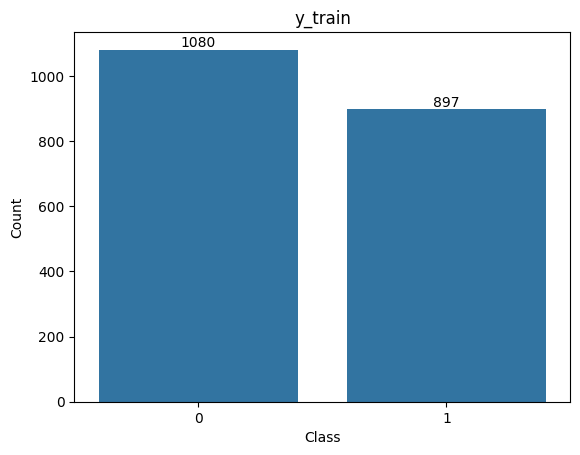

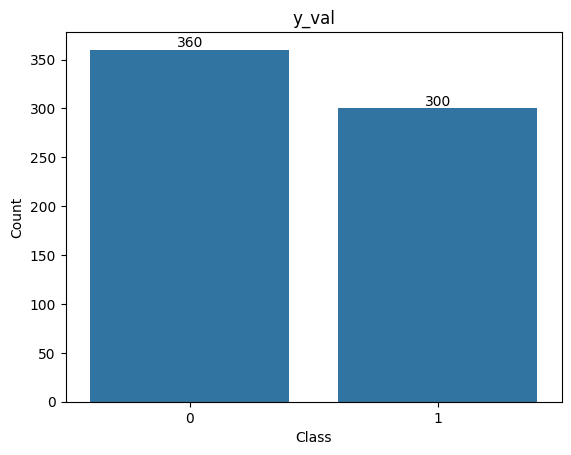

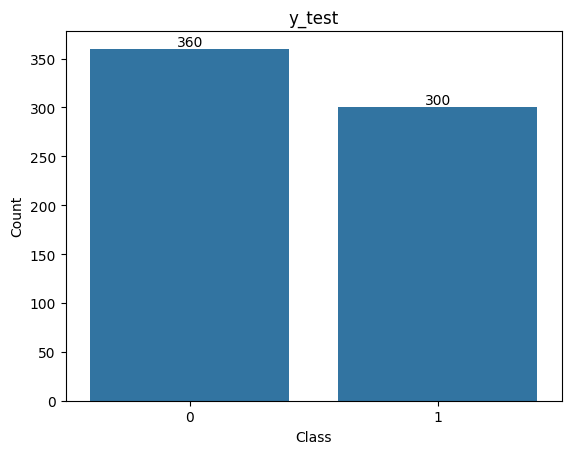

In [ ]:
# Plot class distribution
def plot_class_distribution(y, title):
    unique_values, value_counts = np.unique(y, return_counts=True)
    ax = sns.countplot(x=y)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(unique_values)
    plt.show()
    print()


plot_class_distribution(y_train, 'y_train')
plot_class_distribution(y_val, 'y_val')
plot_class_distribution(y_test, 'y_test')

In [ ]:
# Preprocess images for ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label


X_train, y_train = preprocess(X_train, y_train)
X_val, y_val = preprocess(X_val, y_val)
X_test, y_test = preprocess(X_test, y_test)

In [ ]:
# Build and compile the model
pretrained_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 1)) # Input is 1 channel
# Duplicate the grayscale channel to create a 3 channel input for ResNet50
x = tf.keras.layers.Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_layer)


data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2)
], name='data_augmentation')

da = data_augmentation_layer(x)
x = pretrained_model(da, training=False)
# x = pretrained_model(x, training=False)
bl = tf.keras.layers.BatchNormalization()(x)
flat = tf.keras.layers.Flatten()(bl)
drop = tf.keras.layers.Dropout(0.5)(flat)
dense = tf.keras.layers.Dense(512, activation='relu')(drop)
drop = tf.keras.layers.Dropout(0.5)(dense)
batch = tf.keras.layers.BatchNormalization()(drop)
dense = tf.keras.layers.Dense(32, activation='relu')(batch)
batch = tf.keras.layers.BatchNormalization()(dense)
# batch = tf.keras.layers.BatchNormalization()(flat)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(batch)

model_resnet50 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model_resnet50.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,663,617 (94.08 MB)

 Trainable params: 1,070,721 (4.08 MB)

 Non-trainable params: 23,592,896 (90.00 MB)

In [ ]:
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [ ]:

# Train the model
history = model_resnet50.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 260ms/step - accuracy: 0.5087 - loss: 0.8967 - val_accuracy: 0.4970 - val_loss: 0.6908
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.5013 - loss: 0.7671 - val_accuracy: 0.4545 - val_loss: 0.7040
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 218ms/step - accuracy: 0.4887 - loss: 0.7414 - val_accuracy: 0.4545 - val_loss: 0.7072
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.5112 - loss: 0.7218 - val_accuracy: 0.5455 - val_loss: 0.6891
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.5374 - loss: 0.7103 - val_accuracy: 0.5455 - val_loss: 0.6891
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.5231 - loss: 0.7040 - val_accuracy: 0.5455 - val_loss: 0.6889
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.5049 - loss: 0.7129 - val_accuracy: 0.5455 - val_loss: 0.6905
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.4963 - loss: 0.7169 - val_accu

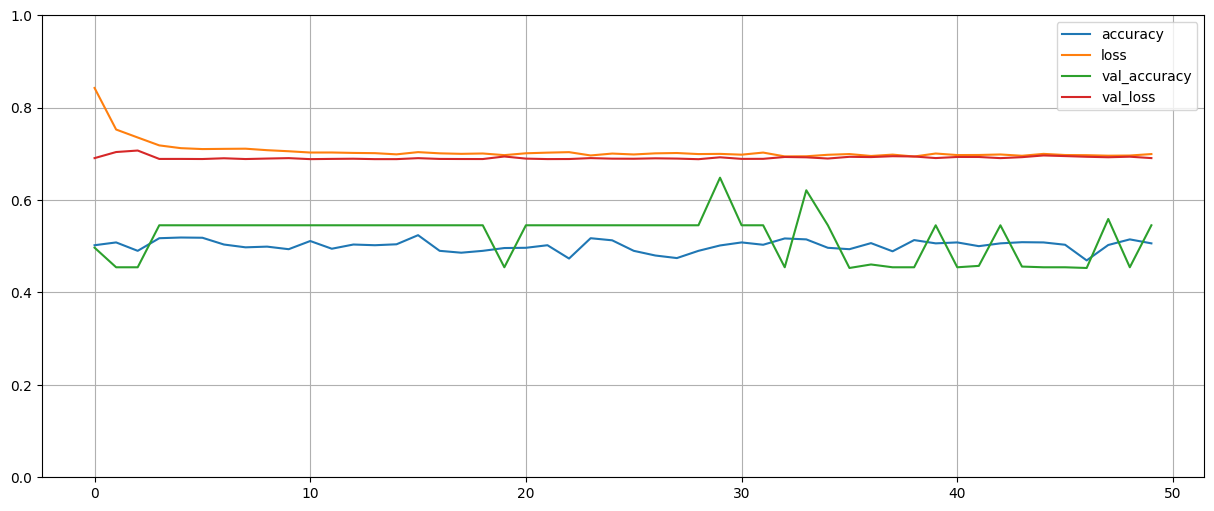

In [ ]:
# Plot training history
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [ ]:
# Evaluate the model
model_resnet50.evaluate(X_test, y_test)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.5464 - loss: 0.6907


[0.6907583475112915, 0.5454545617103577]

In [ ]:

# Predict and evaluate
y_pred = model_resnet50.predict(X_test, verbose=1)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

class_labels = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=class_labels))


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step
              precision    recall  f1-score   support

      Benign       0.55      1.00      0.71       360
   Malignant       0.00      0.00      0.00       300

    accuracy                           0.55       660
   macro avg       0.27      0.50      0.35       660
weighted avg       0.30      0.55      0.39       660



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


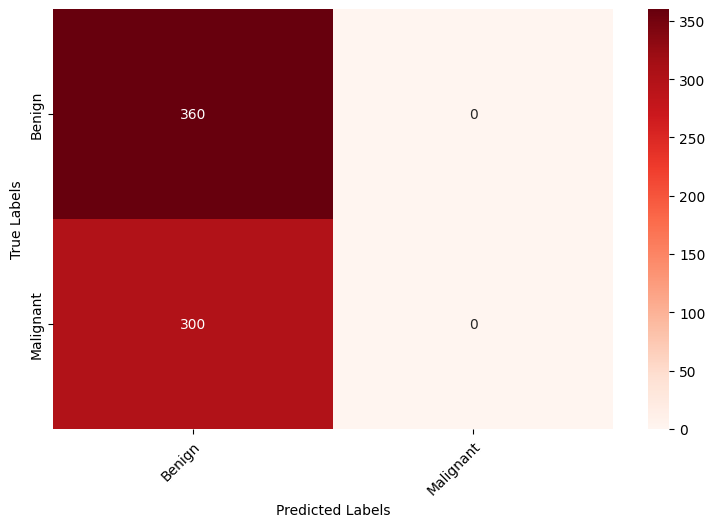

In [ ]:

# Plot confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
labels = list(class_labels)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## ResNet50 1.1 without augmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4


In [ ]:
import os
# List all image files recursively
Skin_img = glob.glob(os.path.join(path, '**', '*.jpg'), recursive=True)

# Print the paths of the first few images
# print(Skin_img)
for imgname in Skin_img[:3]:
    print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1187.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1380.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/866.jpg


In [ ]:
train_data = []
test_data = []

for img_path in Skin_img:
    if 'train' in img_path:
        train_data.append(img_path)
    elif 'test' in img_path:
        test_data.append(img_path)

print(f"Total Training Data Images: {len(train_data)}")
print(f"Total Testing Data Images: {len(test_data)}")
print(f"Sum of Training and Testing Images: {len(train_data)+len(test_data)}")

Total Training Data Images: 5274
Total Testing Data Images: 1320
Sum of Training and Testing Images: 6594


In [ ]:
total_images = len(train_data) + len(test_data)
train_percent = (len(train_data) / total_images) * 100
test_percent = (len(test_data) / total_images) * 100

print(f"Train data: {train_percent:.2f}%")
print(f"Test data: {test_percent:.2f}%")

Train data: 79.98%
Test data: 20.02%


In [ ]:
import os

train_benign = []
train_malignant = []
test_benign = []
test_malignant = []

for img in train_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        train_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        train_malignant.append(img)

for img in test_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        test_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        test_malignant.append(img)

print(f"Number of Images of Benign Class in Training Data: {len(train_benign)}")
print(f"Number of Images of Malignant Class in Training Data: {len(train_malignant)}")
print(f"Number of Images of Benign Class in Testing Data: {len(test_benign)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant)}")

Number of Images of Benign Class in Training Data: 2880
Number of Images of Malignant Class in Training Data: 2394
Number of Images of Benign Class in Testing Data: 720
Number of Images of Maligant Class in Testing Data: 600


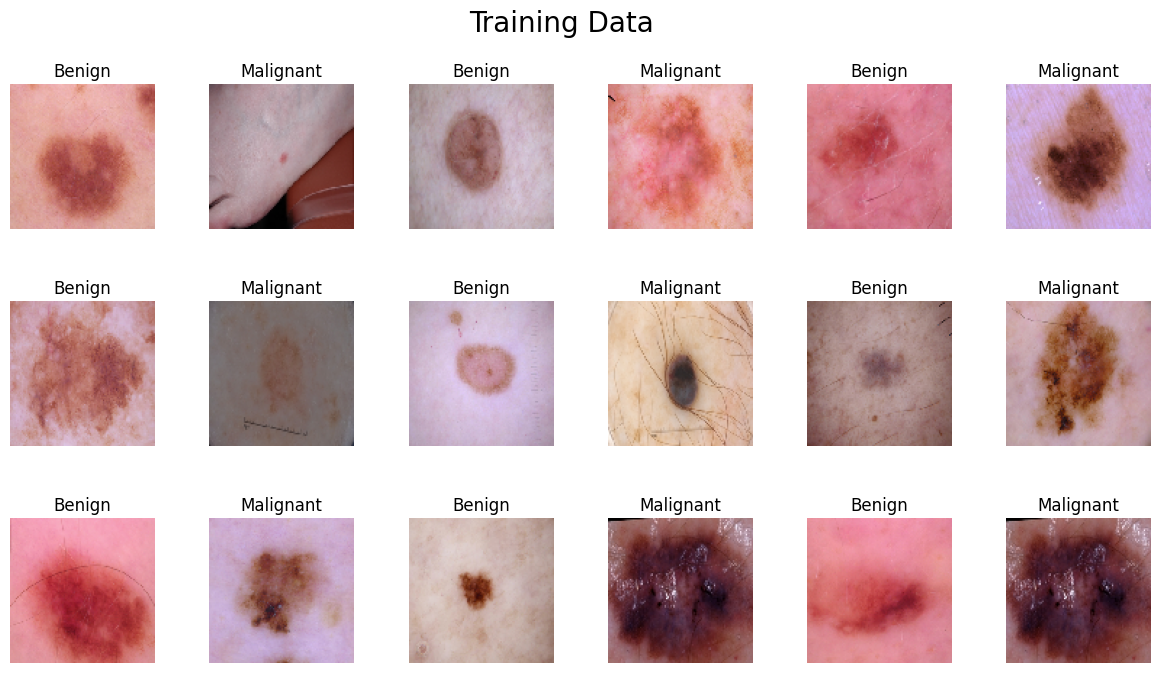

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming train_benign and train_malignant are lists of image paths
some_train_benign = np.random.randint(0, len(train_benign), 9)
some_train_malignant = np.random.randint(0, len(train_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Training Data', fontsize=20)

s = 0
for num in some_train_benign:
    img = image.load_img(train_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_train_malignant:
    img = image.load_img(train_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


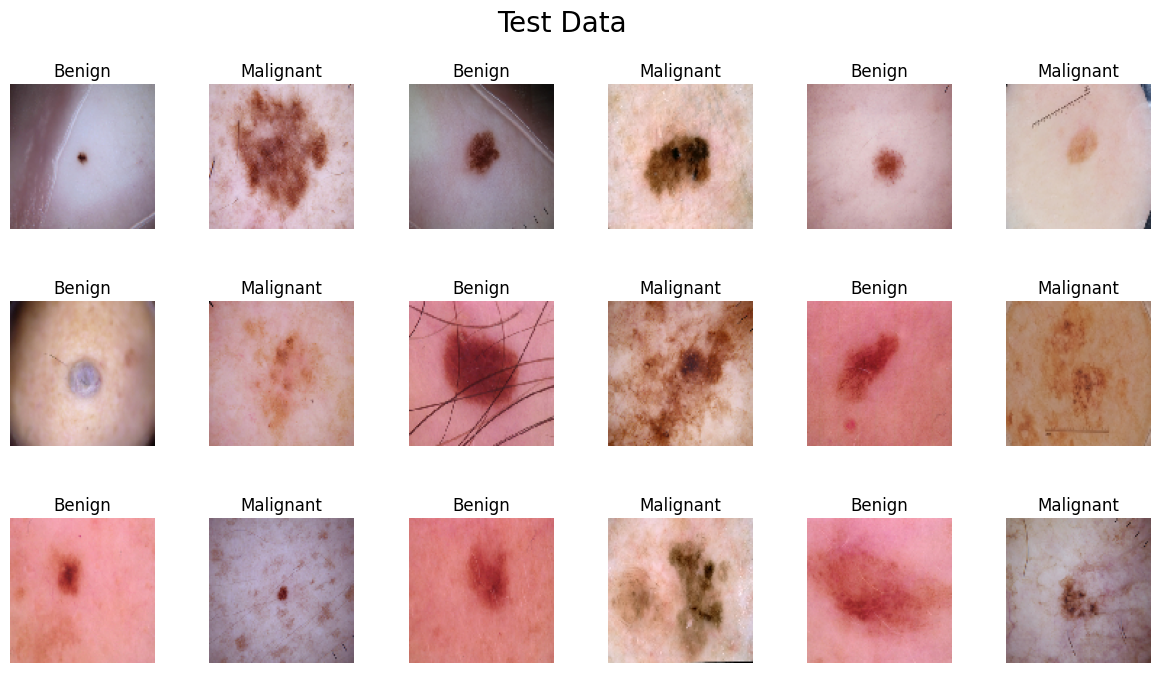

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming test_benign and test_malignant are lists of image paths
some_test_benign = np.random.randint(0, len(test_benign), 9)
some_test_malignant = np.random.randint(0, len(test_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Test Data', fontsize=20)

s = 0
for num in some_test_benign:
    img = image.load_img(test_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_test_malignant:
    img = image.load_img(test_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


In [ ]:

import cv2
import numpy as np
import random
import tensorflow as tf

# Function to preprocess images
def preprocess_image(img_path):
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Resize the image
    img_size = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_gray, dtype=tf.float32)
    # Normalize the image
    # img_tensor = tf.image.per_image_standardization(img_tensor)
    return img_tensor

In [ ]:
# Preprocess train images
train_benign_img_arr = []
train_malignant_img_arr = []

for img in train_benign:
    img_tensor = preprocess_image(img)
    train_benign_img_arr.append([img_tensor, 0])

for img in train_malignant:
    img_tensor = preprocess_image(img)
    train_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Training Data: {len(train_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Training Data: {len(train_malignant_img_arr)}")
print(f"Total Number Training Class Images: {len(train_benign_img_arr) + len(train_malignant_img_arr)}")

Number of Images of Benign Class in Training Data: 2880
Number of Images of Maligant Class in Training Data: 2394
Total Number Training Class Images: 5274


In [ ]:
# Combine and shuffle train data
train_img_arr = train_benign_img_arr + train_malignant_img_arr
random.shuffle(train_img_arr)

X_train = []
y_train = []

for feature, label in train_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_train.append(feature)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5274, 224, 224)
y_train shape: (5274,)


In [ ]:
# Preprocess test images
test_benign_img_arr = []
test_malignant_img_arr = []

for img in test_benign:
    img_tensor = preprocess_image(img)
    test_benign_img_arr.append([img_tensor, 0])

for img in test_malignant:
    img_tensor = preprocess_image(img)
    test_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Testing Data: {len(test_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant_img_arr)}")
print(f"Total Number Testing Class Images: {len(test_benign_img_arr) + len(test_malignant_img_arr)}")


Number of Images of Benign Class in Testing Data: 720
Number of Images of Maligant Class in Testing Data: 600
Total Number Testing Class Images: 1320


In [ ]:
# Combine and shuffle test data
test_img_arr = test_benign_img_arr + test_malignant_img_arr
random.shuffle(test_img_arr)

X_test = []
y_test = []

for feature, label in test_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_test.append(feature)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1320, 224, 224)
y_test shape: (1320,)


In [ ]:
# Split train data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=7)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (3955, 224, 224)
X_val shape: (1319, 224, 224)
y_train shape: (3955,)
y_val shape: (1319,)


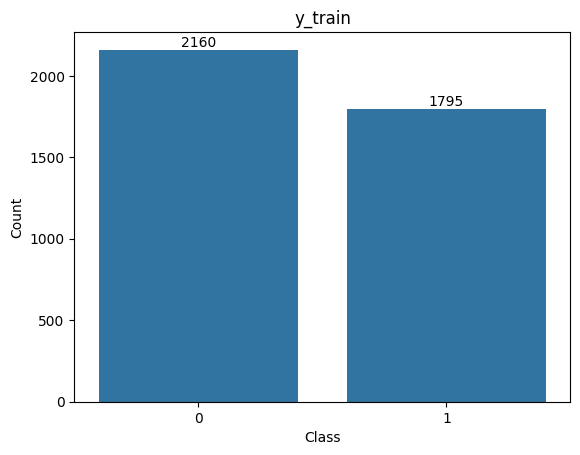

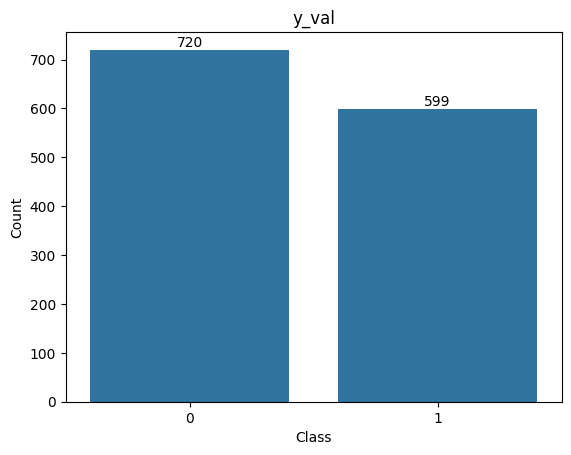

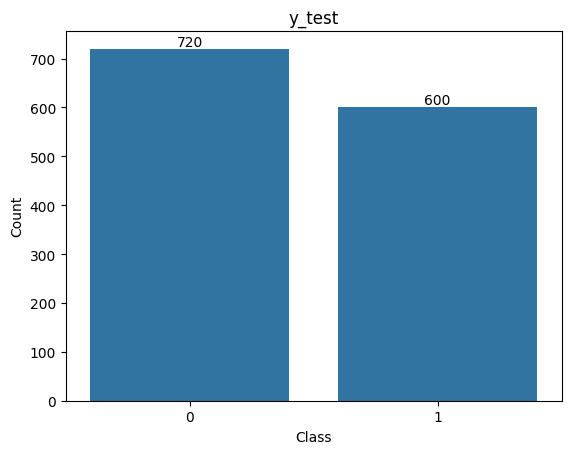

In [ ]:
# Plot class distribution
def plot_class_distribution(y, title):
    unique_values, value_counts = np.unique(y, return_counts=True)
    ax = sns.countplot(x=y)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(unique_values)
    plt.show()
    print()


plot_class_distribution(y_train, 'y_train')

# Add space after the first plot
plt.subplots_adjust(hspace=0.5)  # Adjust hspace for vertical space

plot_class_distribution(y_val, 'y_val')
plot_class_distribution(y_test, 'y_test')

In [ ]:
# Preprocess images for ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label


X_train, y_train = preprocess(X_train, y_train)
X_val, y_val = preprocess(X_val, y_val)
X_test, y_test = preprocess(X_test, y_test)

In [ ]:
# Build and compile the model
pretrained_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable = False

In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 1)) # Input is 1 channel
# Duplicate the grayscale channel to create a 3 channel input for ResNet50
x = tf.keras.layers.Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_layer)


# data_augmentation_layer = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomBrightness(0.2)
# ], name='data_augmentation')

# da = data_augmentation_layer(x)
# x = pretrained_model(da, training=False)
x = pretrained_model(x, training=False)
bl = tf.keras.layers.BatchNormalization()(x)
flat = tf.keras.layers.Flatten()(bl)
drop = tf.keras.layers.Dropout(0.5)(flat)
dense = tf.keras.layers.Dense(512, activation='relu')(drop)
drop = tf.keras.layers.Dropout(0.5)(dense)
batch = tf.keras.layers.BatchNormalization()(drop)
dense = tf.keras.layers.Dense(32, activation='relu')(batch)
batch = tf.keras.layers.BatchNormalization()(dense)
# batch = tf.keras.layers.BatchNormalization()(flat)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(batch)

model_resnet50 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model_resnet50.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,663,617 (94.08 MB)

 Trainable params: 1,070,721 (4.08 MB)

 Non-trainable params: 23,592,896 (90.00 MB)

In [ ]:
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [ ]:

# Train the model
history = model_resnet50.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.6880 - loss: 0.6083 - val_accuracy: 0.4541 - val_loss: 0.9970
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.7592 - loss: 0.5070 - val_accuracy: 0.4541 - val_loss: 1.0426
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.7504 - loss: 0.5075 - val_accuracy: 0.4602 - val_loss: 0.7903
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.7588 - loss: 0.5067 - val_accuracy: 0.4746 - val_loss: 0.6982
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.7694 - loss: 0.4677 - val_accuracy: 0.7923 - val_loss: 0.4915
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.7792 - loss: 0.4664 - val_accuracy: 0.7968 - val_loss: 0.4550
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.7839 - loss: 0.4618 - val_accuracy: 0.8173 - val_loss: 0.4223
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.7872 - loss: 0

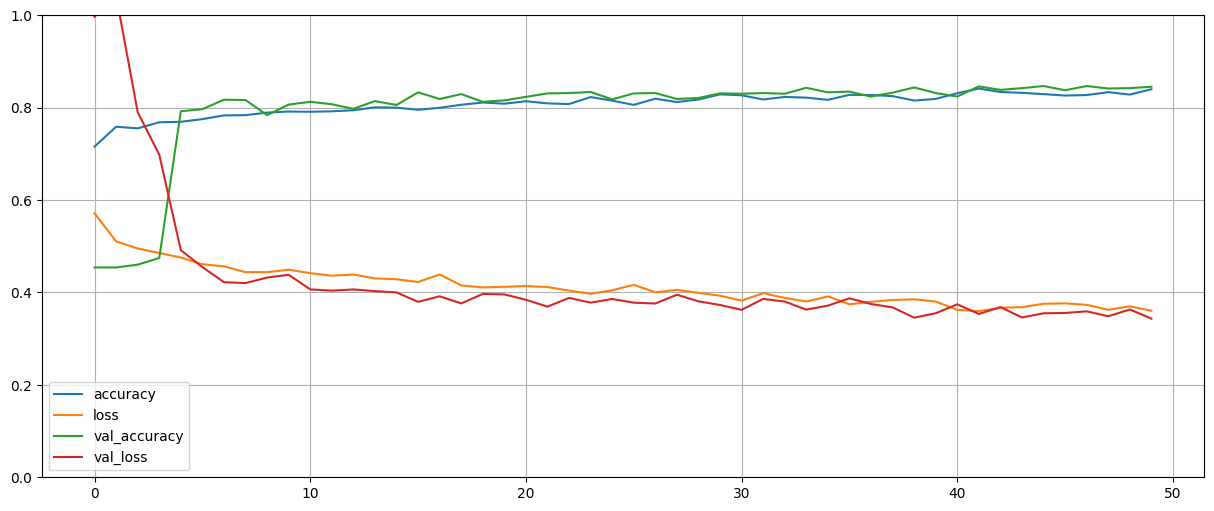

In [ ]:
# Plot training history
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [ ]:
# Evaluate the model
model_resnet50.evaluate(X_test, y_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.7624 - loss: 0.4542


[0.42890092730522156, 0.7757575511932373]

In [ ]:

# Predict and evaluate
y_pred = model_resnet50.predict(X_test, verbose=1)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

class_labels = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=class_labels))


42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step
              precision    recall  f1-score   support

      Benign       0.81      0.78      0.79       720
   Malignant       0.74      0.78      0.76       600

    accuracy                           0.78      1320
   macro avg       0.77      0.78      0.77      1320
weighted avg       0.78      0.78      0.78      1320



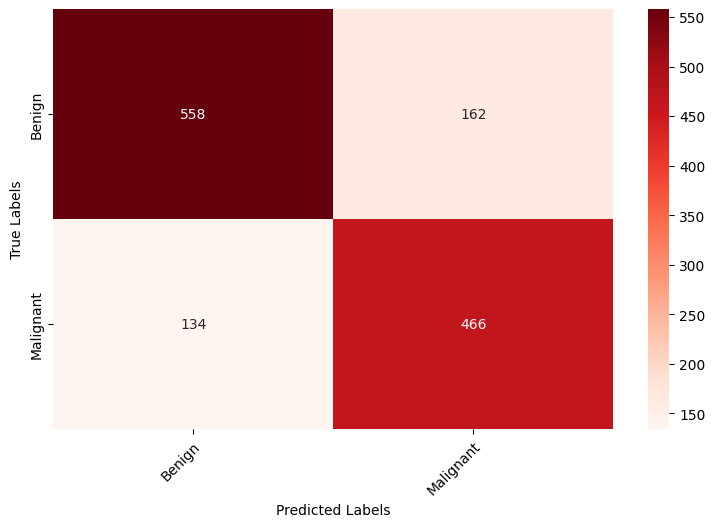

In [ ]:

# Plot confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
labels = list(class_labels)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## ResNet50 1.2 without augmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", path)

100%|██████████| 325M/325M [00:01<00:00, 175MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4


In [ ]:
# import os
# # List all image files recursively
# Skin_img = glob.glob(os.path.join(path, '**', '*.jpg'), recursive=True)

# # Print the paths of the first few images
# # print(Skin_img)
# for imgname in Skin_img[:3]:
#     print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1187.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/1380.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/test/malignant/866.jpg


In [ ]:
import os
# List all image files recursively
# Skin_img = glob.glob(os.path.join(path, '**', '*.jpg'), recursive=True)

Skin_img = tf.io.gfile.glob(str(path + '/data/train/*/*'))
# Skin_img.extend(tf.io.gfile.glob(str(path + '/chest_xray/val/*/*')))
Skin_img.extend(tf.io.gfile.glob(str(path + '/data/test/*/*')))
# Print the paths of the first few images
# print(Skin_img)
for imgname in Skin_img[:3]:
    print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/benign/143.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/benign/456.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/benign/252.jpg


In [ ]:
train_data = []
test_data = []

for img_path in Skin_img:
    if 'train' in img_path:
        train_data.append(img_path)
    elif 'test' in img_path:
        test_data.append(img_path)

print(f"Total Training Data Images: {len(train_data)}")
print(f"Total Testing Data Images: {len(test_data)}")
print(f"Sum of Training and Testing Images: {len(train_data)+len(test_data)}")

Total Training Data Images: 2637
Total Testing Data Images: 660
Sum of Training and Testing Images: 3297


In [ ]:
total_images = len(train_data) + len(test_data)
train_percent = (len(train_data) / total_images) * 100
test_percent = (len(test_data) / total_images) * 100

print(f"Train data: {train_percent:.2f}%")
print(f"Test data: {test_percent:.2f}%")

Train data: 79.98%
Test data: 20.02%


In [ ]:
import os

train_benign = []
train_malignant = []
test_benign = []
test_malignant = []

for img in train_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        train_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        train_malignant.append(img)

for img in test_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        test_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        test_malignant.append(img)

print(f"Number of Images of Benign Class in Training Data: {len(train_benign)}")
print(f"Number of Images of Malignant Class in Training Data: {len(train_malignant)}")
print(f"Number of Images of Benign Class in Testing Data: {len(test_benign)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant)}")

Number of Images of Benign Class in Training Data: 1440
Number of Images of Malignant Class in Training Data: 1197
Number of Images of Benign Class in Testing Data: 360
Number of Images of Maligant Class in Testing Data: 300


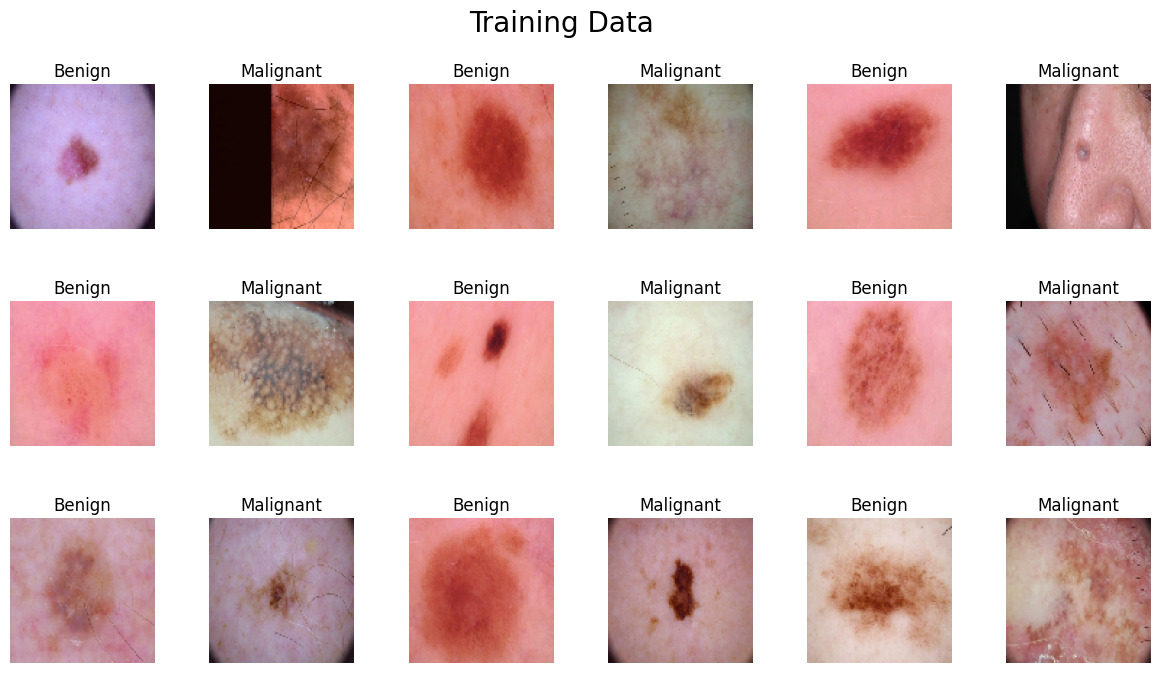

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming train_benign and train_malignant are lists of image paths
some_train_benign = np.random.randint(0, len(train_benign), 9)
some_train_malignant = np.random.randint(0, len(train_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Training Data', fontsize=20)

s = 0
for num in some_train_benign:
    img = image.load_img(train_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_train_malignant:
    img = image.load_img(train_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


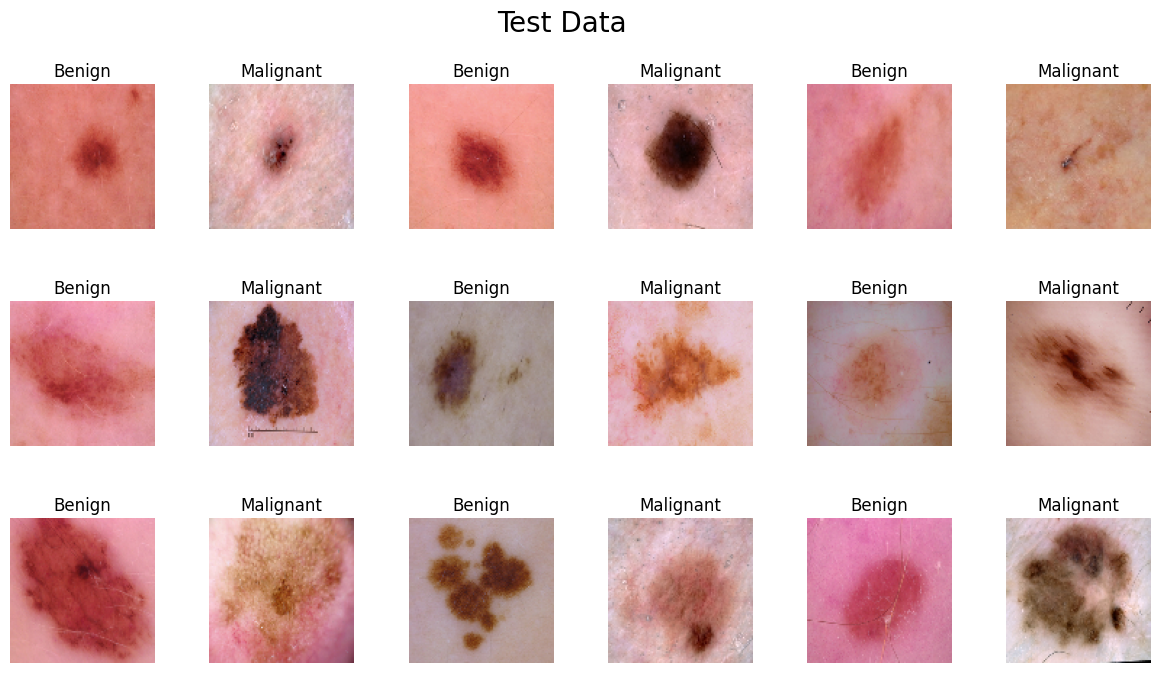

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming test_benign and test_malignant are lists of image paths
some_test_benign = np.random.randint(0, len(test_benign), 9)
some_test_malignant = np.random.randint(0, len(test_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Test Data', fontsize=20)

s = 0
for num in some_test_benign:
    img = image.load_img(test_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_test_malignant:
    img = image.load_img(test_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


In [ ]:

import cv2
import numpy as np
import random
import tensorflow as tf

# Function to preprocess images
def preprocess_image(img_path):
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Resize the image
    img_size = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_gray, dtype=tf.float32)
    # Normalize the image
    # img_tensor = tf.image.per_image_standardization(img_tensor)
    return img_tensor

In [ ]:
# Preprocess train images
train_benign_img_arr = []
train_malignant_img_arr = []

for img in train_benign:
    img_tensor = preprocess_image(img)
    train_benign_img_arr.append([img_tensor, 0])

for img in train_malignant:
    img_tensor = preprocess_image(img)
    train_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Training Data: {len(train_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Training Data: {len(train_malignant_img_arr)}")
print(f"Total Number Training Class Images: {len(train_benign_img_arr) + len(train_malignant_img_arr)}")

Number of Images of Benign Class in Training Data: 1440
Number of Images of Maligant Class in Training Data: 1197
Total Number Training Class Images: 2637


In [ ]:
# Combine and shuffle train data
train_img_arr = train_benign_img_arr + train_malignant_img_arr
random.shuffle(train_img_arr)

X_train = []
y_train = []

for feature, label in train_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_train.append(feature)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2637, 224, 224)
y_train shape: (2637,)


In [ ]:
# Preprocess test images
test_benign_img_arr = []
test_malignant_img_arr = []

for img in test_benign:
    img_tensor = preprocess_image(img)
    test_benign_img_arr.append([img_tensor, 0])

for img in test_malignant:
    img_tensor = preprocess_image(img)
    test_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Testing Data: {len(test_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant_img_arr)}")
print(f"Total Number Testing Class Images: {len(test_benign_img_arr) + len(test_malignant_img_arr)}")


Number of Images of Benign Class in Testing Data: 360
Number of Images of Maligant Class in Testing Data: 300
Total Number Testing Class Images: 660


In [ ]:
# Combine and shuffle test data
test_img_arr = test_benign_img_arr + test_malignant_img_arr
random.shuffle(test_img_arr)

X_test = []
y_test = []

for feature, label in test_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_test.append(feature)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (660, 224, 224)
y_test shape: (660,)


In [ ]:
# Split train data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=7)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (1977, 224, 224)
X_val shape: (660, 224, 224)
y_train shape: (1977,)
y_val shape: (660,)


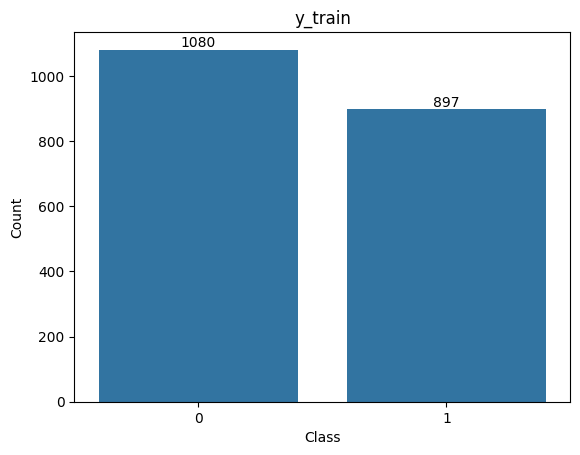

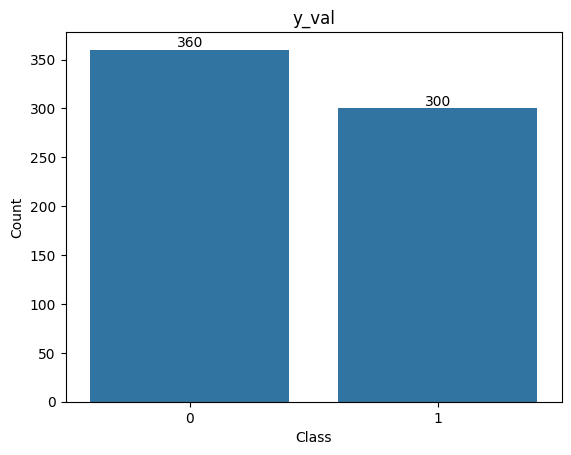

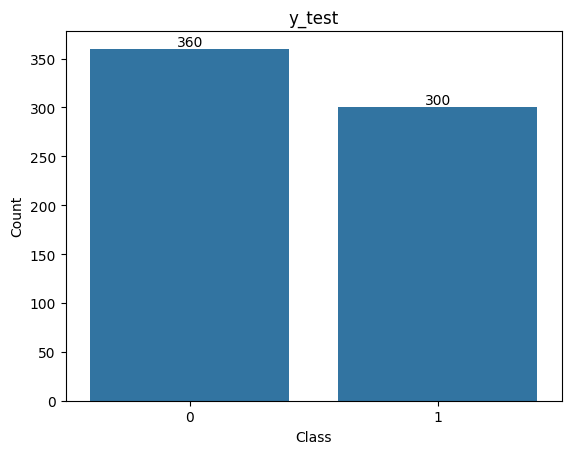

In [ ]:
# Plot class distribution
def plot_class_distribution(y, title):
    unique_values, value_counts = np.unique(y, return_counts=True)
    ax = sns.countplot(x=y)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(unique_values)
    plt.show()
    print()


plot_class_distribution(y_train, 'y_train')
plot_class_distribution(y_val, 'y_val')
plot_class_distribution(y_test, 'y_test')

In [ ]:
# Preprocess images for ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label


X_train, y_train = preprocess(X_train, y_train)
X_val, y_val = preprocess(X_val, y_val)
X_test, y_test = preprocess(X_test, y_test)

In [ ]:
# Build and compile the model
pretrained_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 1)) # Input is 1 channel
# Duplicate the grayscale channel to create a 3 channel input for ResNet50
x = tf.keras.layers.Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_layer)


# data_augmentation_layer = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomBrightness(0.2)
# ], name='data_augmentation')

# da = data_augmentation_layer(x)
# x = pretrained_model(da, training=False)
x = pretrained_model(x, training=False)
bl = tf.keras.layers.BatchNormalization()(x)
flat = tf.keras.layers.Flatten()(bl)
drop = tf.keras.layers.Dropout(0.5)(flat)
dense = tf.keras.layers.Dense(512, activation='relu')(drop)
drop = tf.keras.layers.Dropout(0.5)(dense)
batch = tf.keras.layers.BatchNormalization()(drop)
dense = tf.keras.layers.Dense(32, activation='relu')(batch)
batch = tf.keras.layers.BatchNormalization()(dense)
# batch = tf.keras.layers.BatchNormalization()(flat)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(batch)

model_resnet50 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model_resnet50.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,663,617 (94.08 MB)

 Trainable params: 1,070,721 (4.08 MB)

 Non-trainable params: 23,592,896 (90.00 MB)

In [ ]:
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [ ]:

# Train the model
history = model_resnet50.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 385ms/step - accuracy: 0.6792 - loss: 0.6657 - val_accuracy: 0.4530 - val_loss: 0.7853
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.7474 - loss: 0.5373 - val_accuracy: 0.4545 - val_loss: 1.0414
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.7421 - loss: 0.5155 - val_accuracy: 0.4545 - val_loss: 0.9093
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7615 - loss: 0.5141 - val_accuracy: 0.4545 - val_loss: 0.8182
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.7590 - loss: 0.5118 - val_accuracy: 0.4576 - val_loss: 0.7741
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.7836 - loss: 0.4662 - val_accuracy: 0.4591 - val_loss: 0.6695
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.7772 - loss: 0.4630 - val_accuracy: 0.4788 - val_loss: 0.6786
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.7732 - loss: 0.4790 - val_accuracy

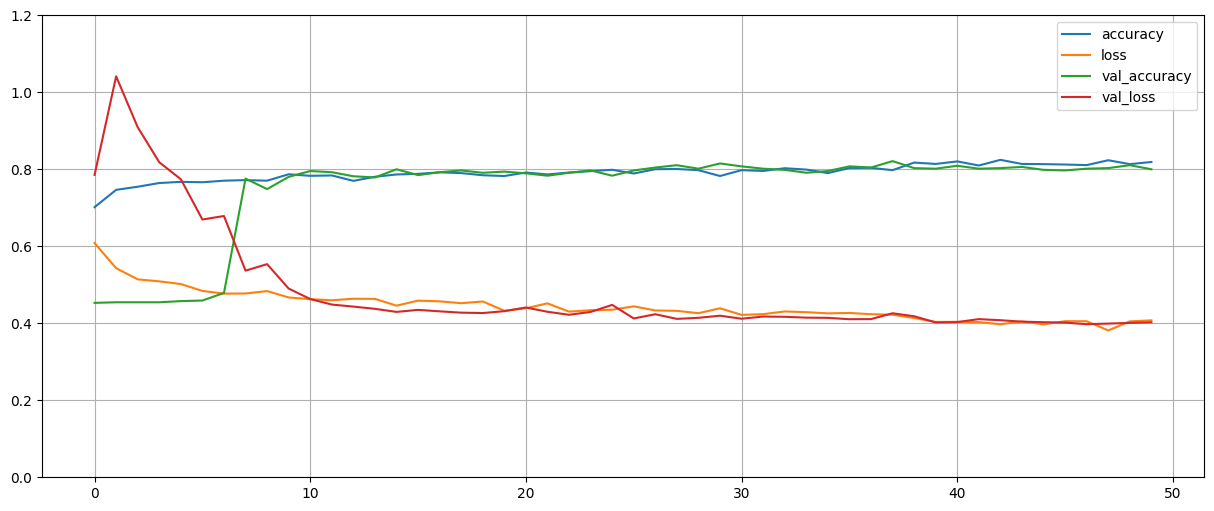

In [ ]:
# Plot training history
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.show()



In [ ]:
# Evaluate the model
model_resnet50.evaluate(X_test, y_test)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7926 - loss: 0.4431


[0.42903244495391846, 0.789393961429596]

In [ ]:

# Predict and evaluate
y_pred = model_resnet50.predict(X_test, verbose=1)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

class_labels = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=class_labels))


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step
              precision    recall  f1-score   support

      Benign       0.81      0.81      0.81       360
   Malignant       0.77      0.77      0.77       300

    accuracy                           0.79       660
   macro avg       0.79      0.79      0.79       660
weighted avg       0.79      0.79      0.79       660



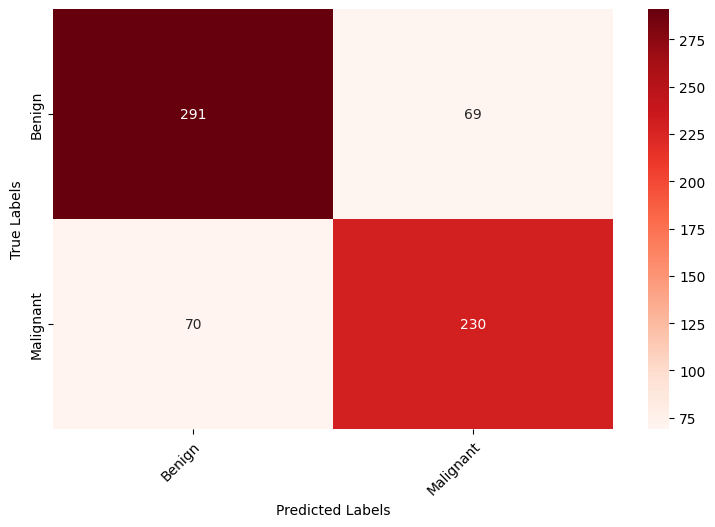

In [ ]:

# Plot confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
labels = list(class_labels)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()